In [1]:
#import the relevant libraries
import numpy as np
import matplotlib.pyplot as plt


# First check on ECG the composition of idft and dft 

In [2]:
# Create a datamodule for ECG
from fdiff.dataloaders.datamodules import ECGDatamodule

datamodule = ECGDatamodule()

datamodule.prepare_data()
datamodule.setup("fit")

/home/nvth2/miniconda/envs/fourier/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
#Extract the training set
X_train_time = datamodule.X_train[:10]
print(X_train_time.shape)

#Import the dft and idft functions
from fdiff.utils.fourier import dft, idft
X_train_freq = dft(X_train_time)
assert X_train_freq.shape == X_train_time.shape

import torch
X_train_map = idft(X_train_freq)
assert torch.isclose(X_train_map, X_train_time, atol = 1e-6).all()

print("X_train_map", X_train_map[0, :10])
print("X_train_time", X_train_time[0, :10])

torch.Size([10, 187, 1])
X_train_map tensor([[0.9601],
        [0.8632],
        [0.4615],
        [0.1966],
        [0.0940],
        [0.1254],
        [0.0997],
        [0.0883],
        [0.0741],
        [0.0826]])
X_train_time tensor([[0.9601],
        [0.8632],
        [0.4615],
        [0.1966],
        [0.0940],
        [0.1254],
        [0.0997],
        [0.0883],
        [0.0741],
        [0.0826]])


# Sample from the best checkpoint


In [61]:
!python ../cmd/sample.py model_id=jwedsoeh model_path=/home/nvth2/FourierDiffusion/cmd/lightning_logs

[2023-12-04 13:49:34,401][root][INFO] - Welcome in the sampling script! You are using the following config:
	 model_path               : 	  /home/nvth2/FourierDiffusion/cmd/lightning_logs 	 
	 model_id                 : 	  jwedsoeh 	 
	 num_samples              : 	  1000 	 
	 num_diffusion_steps      : 	  1000 	 
	 random_seed              : 	  42 	 
	 sampler                  : 	  fdiff.sampling.sampler.DiffusionSampler 	 
	 sample_batch_size        : 	  200 	 
	 metrics                  : 	  ['fdiff.sampling.metrics.MarginalWasserstein'] 	 
	 include_baselines        : 	  True 	 

Diffusion: 100%|██████████████████████████▉| 999/1000 [01:31<00:00, 10.88step/s]
[2023-12-04 13:57:22,456][root][INFO] - Metrics:                                eature/s]
	 freq_marginal_wasserstein_max             : 	  2.0086642113327833 	 
	 freq_marginal_wasserstein_max_dummy       : 	  1.4436577650403482 	 
	 freq_marginal_wasserstein_max_self        : 	  0.433492345022024 	 
	 freq_marginal_wasserstein

# Check the metrics

In [4]:

X_train_time = datamodule.X_train
#Load the generated samples
X_train_sampled = torch.load("../cmd/lightning_logs/xilf6yhj/samples.pt")
from fdiff.sampling.metrics import MarginalWasserstein
from pathlib import Path

marginalW = MarginalWasserstein(dft(X_train_time).detach().cpu().numpy(), random_seed=42)
pathSave = "distances2"
marginalW.save(dft(X_train_sampled), pathSave)
#Load the distances
import numpy as np
distances2 = np.load(pathSave + ".npy")


Computing marginal Wasserstein:   0%|          | 0/187 [00:00<?, ?feature/s]

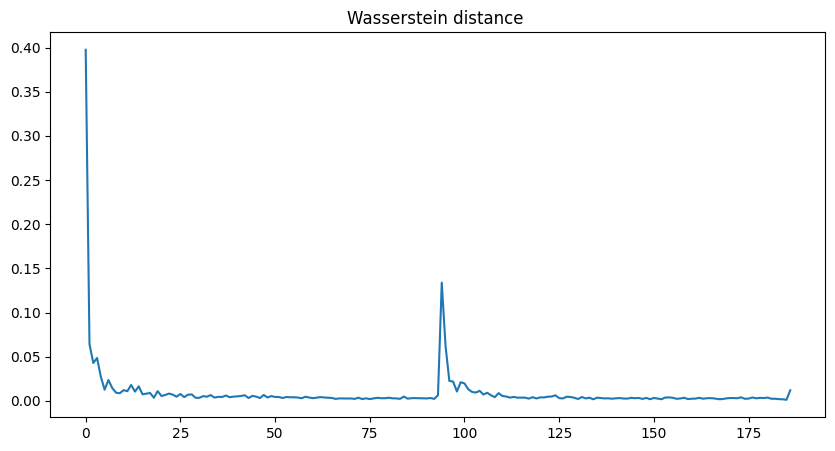

[ 3 95  1 94  0]
[0.04854096 0.06214472 0.06422367 0.1339205  0.39756059]
0.008991371244455341


In [6]:
X_train_time = datamodule.X_train
#Load the generated samples
X_train_sampled = torch.load("../cmd/lightning_logs/dnjteq4a/samples.pt")
from fdiff.sampling.metrics import MarginalWasserstein
from pathlib import Path

marginalW = MarginalWasserstein(dft(X_train_time).detach().cpu().numpy(), random_seed=42)
pathSave = "distances"
marginalW.save(dft(X_train_sampled), pathSave)
#Load the distances
import numpy as np
distances = np.load(pathSave + ".npy")

#Plot the distances feature by feature
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(distances)
plt.title("Wasserstein distance ")
plt.show()

#Print the top 5 features with the highest distances
top5 = np.argsort(distances)[-5:]
print(top5)
print(distances[top5])

print(distances.mean())
#X_train_sampled = torch.load("../cmd/lightning_logs/sb8jm0nr/samples.pt")

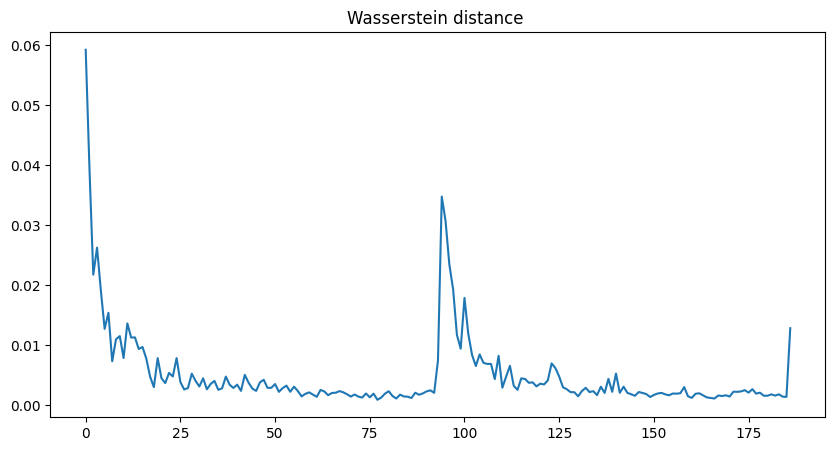

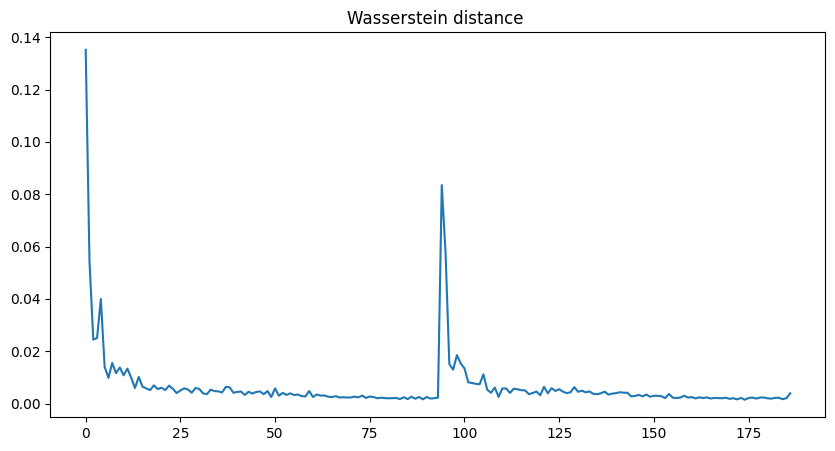

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(distances)
plt.title("Wasserstein distance ")
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(distances2)
plt.title("Wasserstein distance ")
plt.show()



In [9]:
print(X_train_time.shape)

torch.Size([87553, 187, 1])


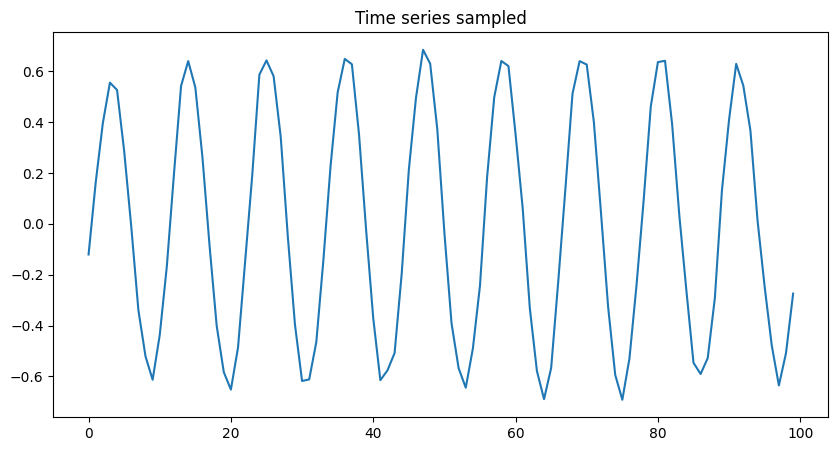

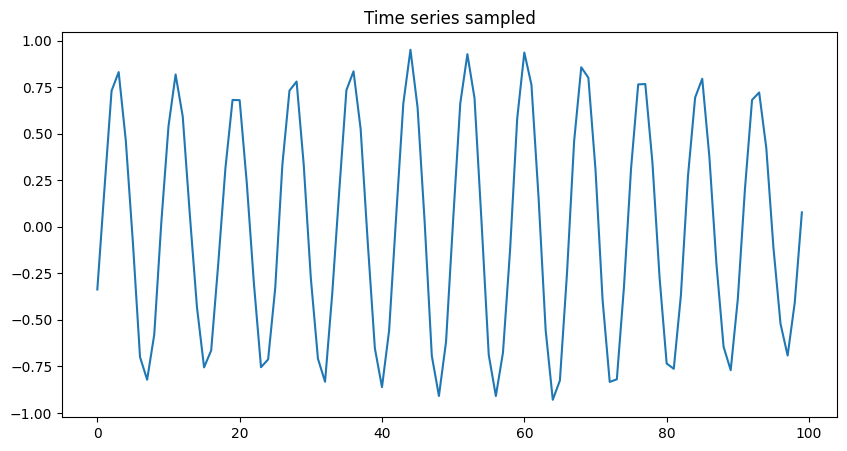

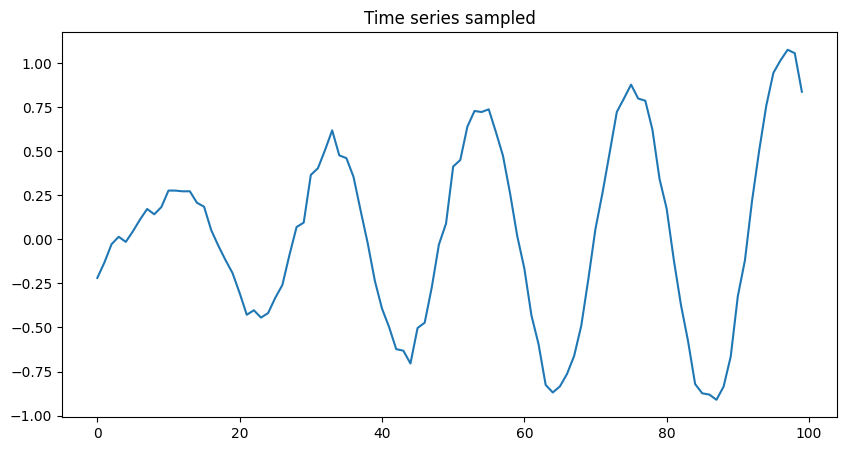

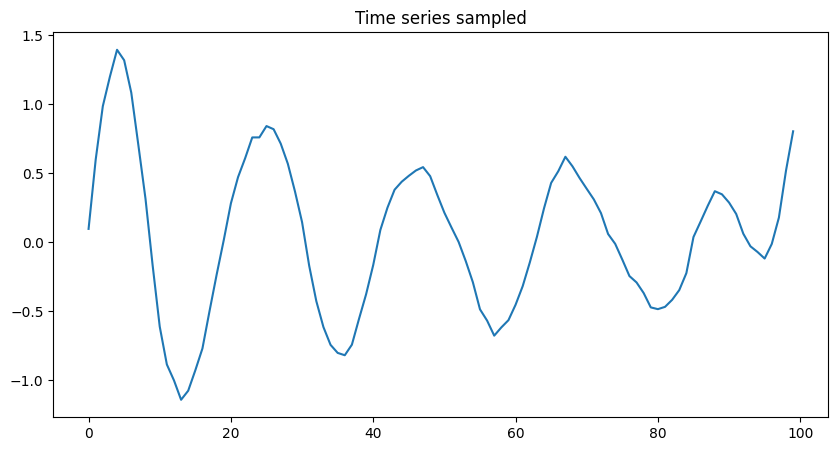

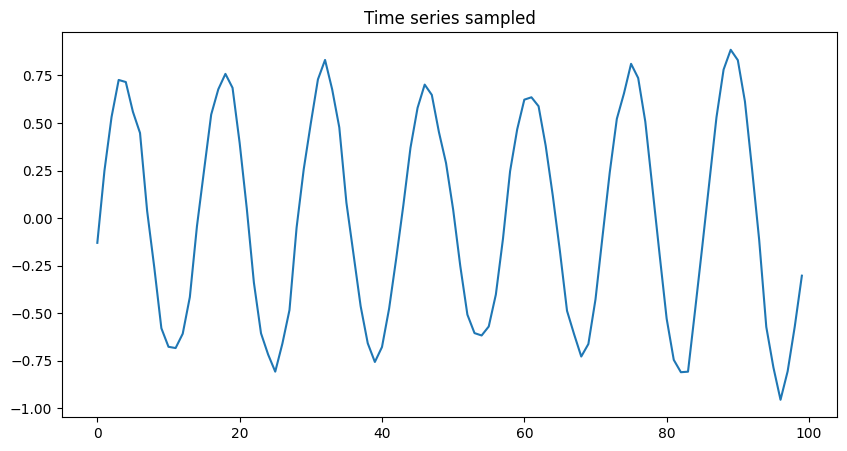

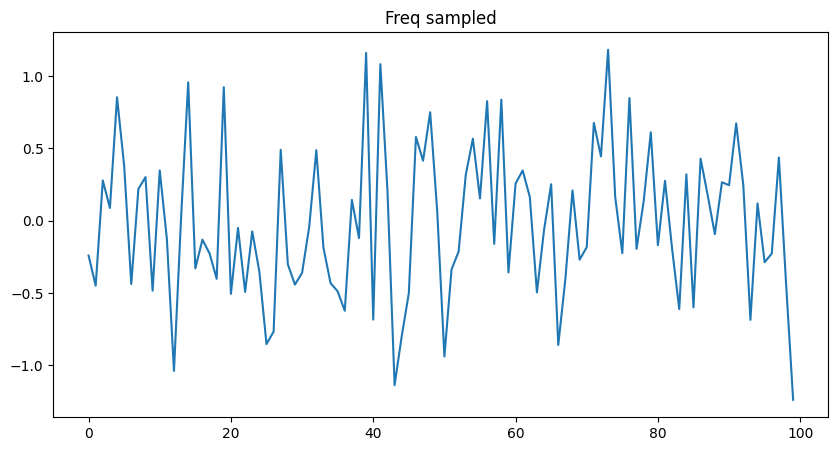

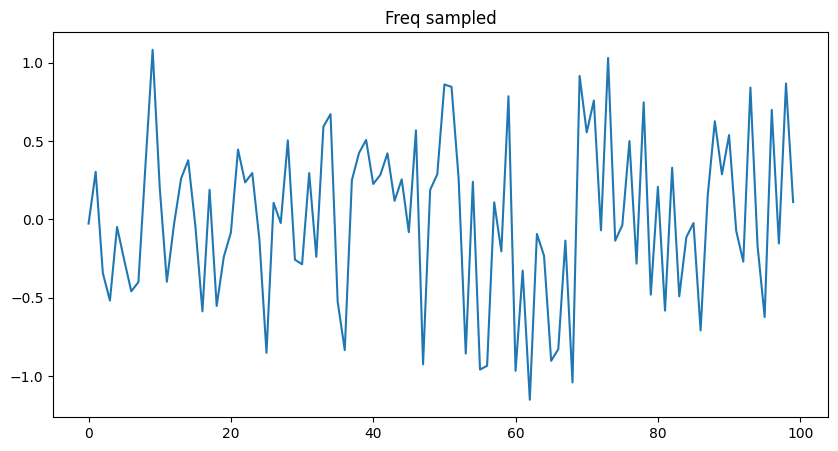

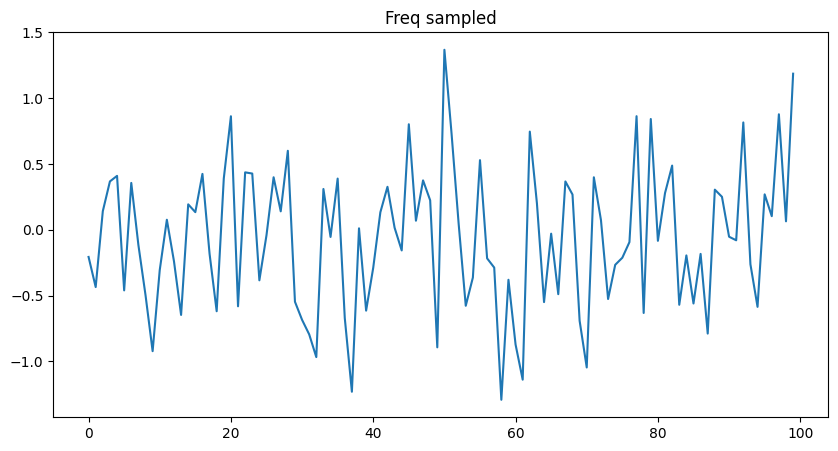

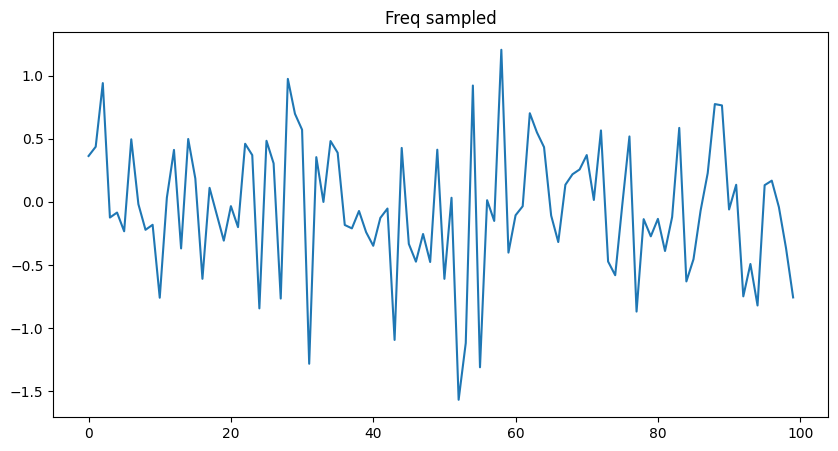

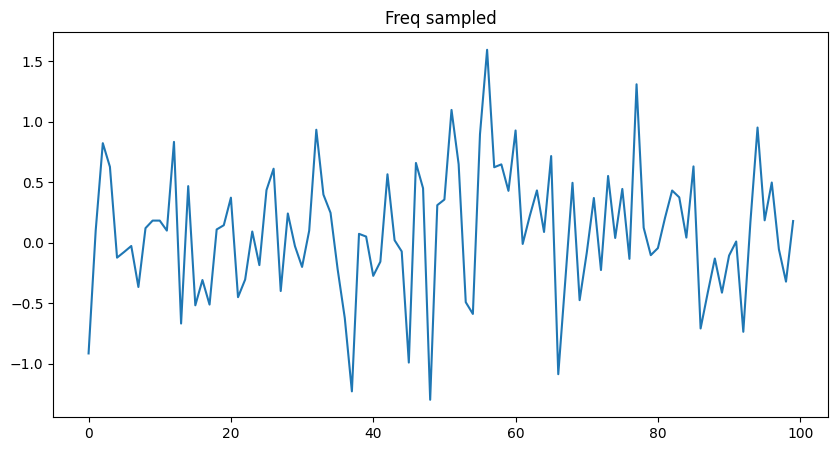

In [12]:
import torch
#import dft
from fdiff.utils.fourier import dft, idft
model_id = "b5xr6c83"
X_train_sampled_time = torch.load(f"../cmd/lightning_logs/{model_id}/samples.pt")
X_train_sampled_freq = dft(X_train_sampled_time)
#Plot some time series sampled
import matplotlib.pyplot as plt
for i in range(5,10):
    plt.figure(figsize=(10, 5))
    plt.plot(X_train_sampled[i, :])
    plt.title("Time series sampled")
    plt.show()

for i in range(5,10):
    plt.figure(figsize=(10, 5))
    plt.plot(X_train_sampled_freq[i, :])
    plt.title("Freq sampled")
    plt.show()



In [11]:
#Plot some real time series
for i in range(5):
    plt.figure(figsize=(10, 5))
    plt.plot(X_train_time[i, :])
    plt.show()

NameError: name 'X_train_time' is not defined

<Figure size 1000x500 with 0 Axes>

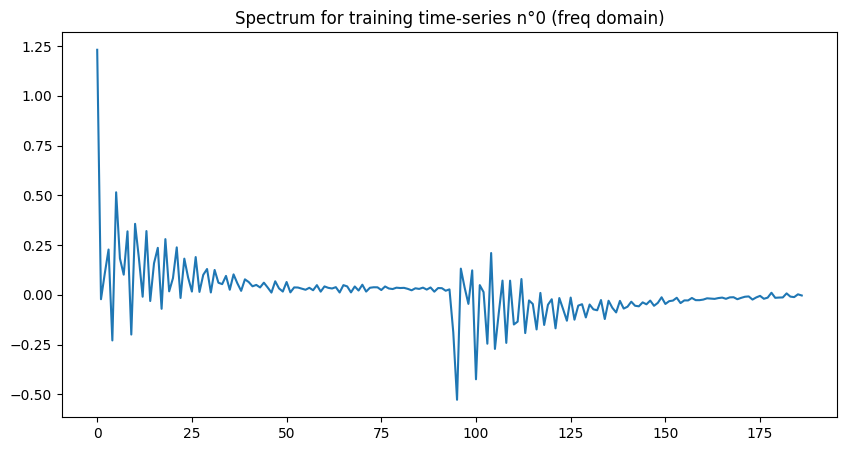

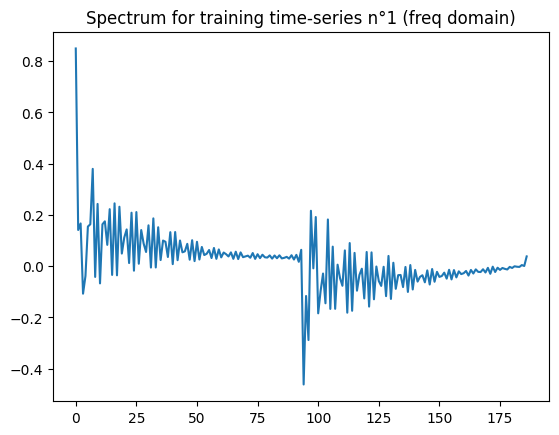

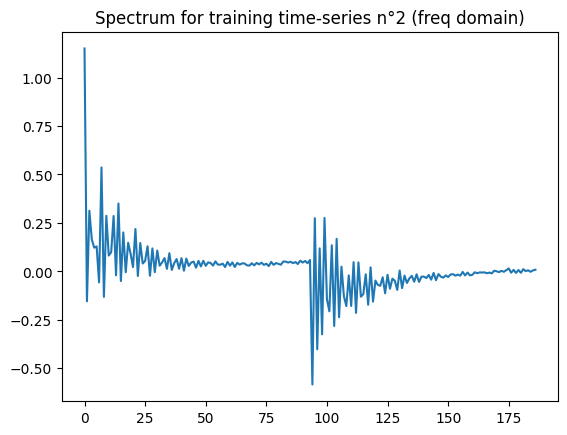

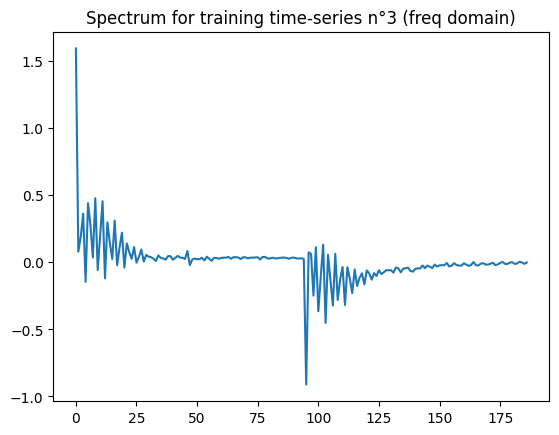

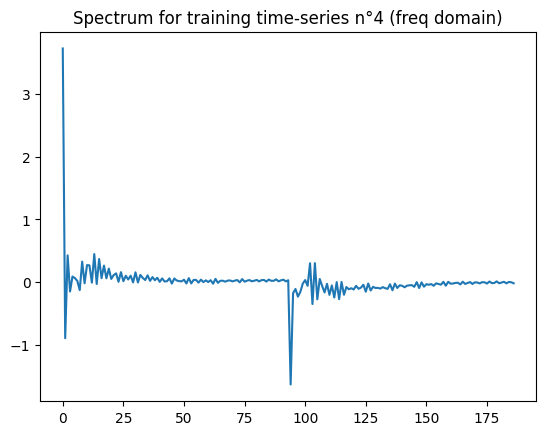

In [11]:
#Plot the spectrum of the time series
plt.figure(figsize=(10, 5))
X_train_freq = dft(X_train_time)
for i in range(5):
    plt.plot(X_train_freq[i])
    plt.title(f"Spectrum for training time-series n°{i} (freq domain)")
    plt.show()

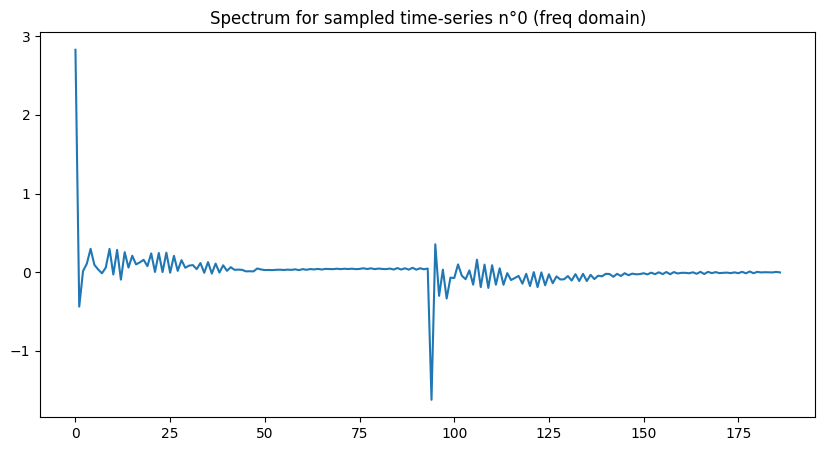

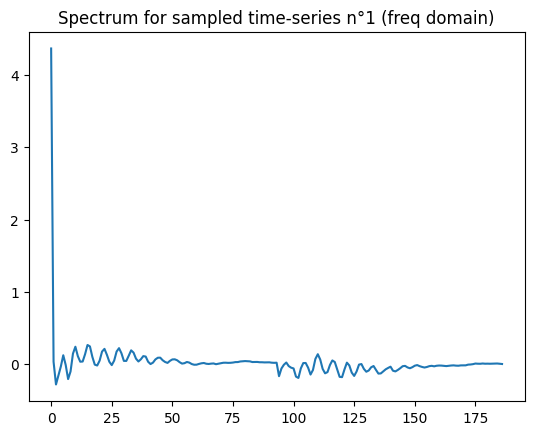

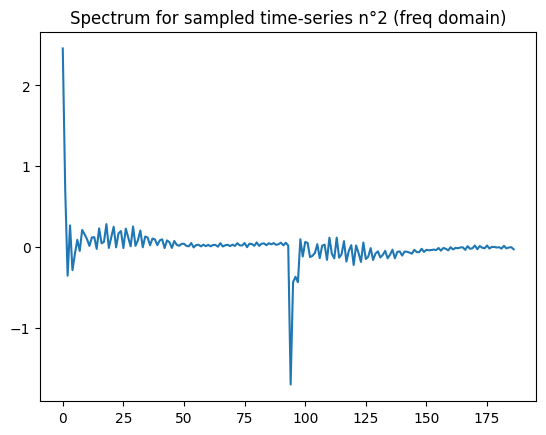

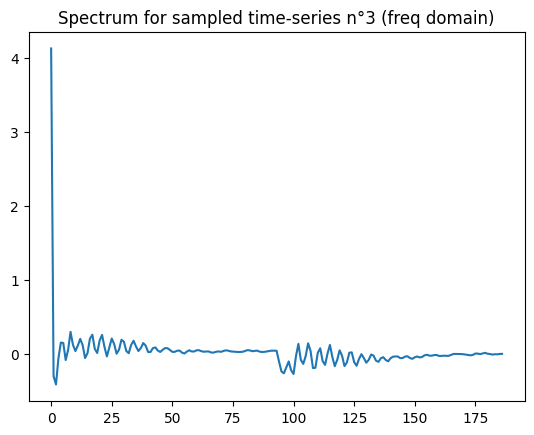

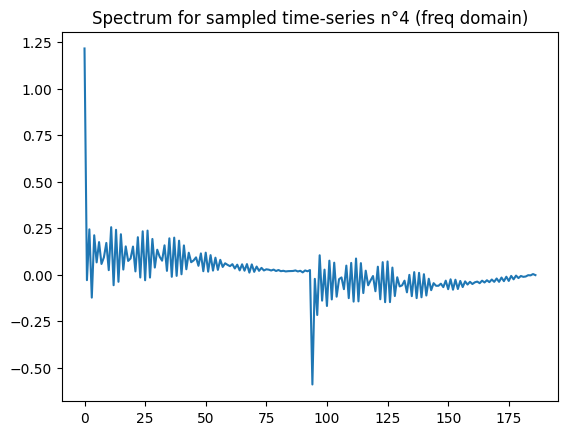

In [8]:
#Plot the spectrum of the time series
plt.figure(figsize=(10, 5))
X_sampled_freq = dft(X_train_sampled)
for i in range(5):
    plt.plot(X_sampled_freq[i])
    plt.title(f"Spectrum for sampled time-series n°{i} (freq domain)")
    plt.show()

In [9]:
X_train_freq = dft(X_train_time).detach().cpu().numpy()
X_sampled_freq = dft(X_train_sampled).detach().cpu().numpy()

/tmp/ipykernel_418787/2091903188.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_freq[:, index, 0], label="train")
/tmp/ipykernel_418787/2091903188.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_sampled_freq[:, index, 0], label="sampled")


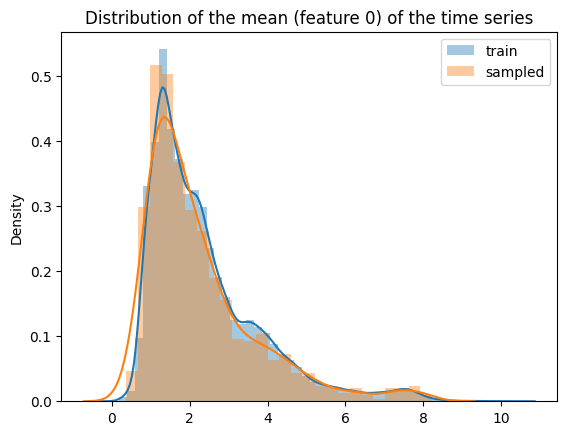

In [10]:
#plot the distribution with seaborne
import seaborn as sns

index = 0
sns.distplot(X_train_freq[:, index, 0], label="train")
sns.distplot(X_sampled_freq[:, index, 0], label="sampled")
plt.title("Distribution of the mean (feature 0) of the time series")
plt.legend()

/tmp/ipykernel_411939/3281188933.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_freq[:, index, 0], label="train")
/tmp/ipykernel_411939/3281188933.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_sampled_freq[:, index, 0], label="sampled")


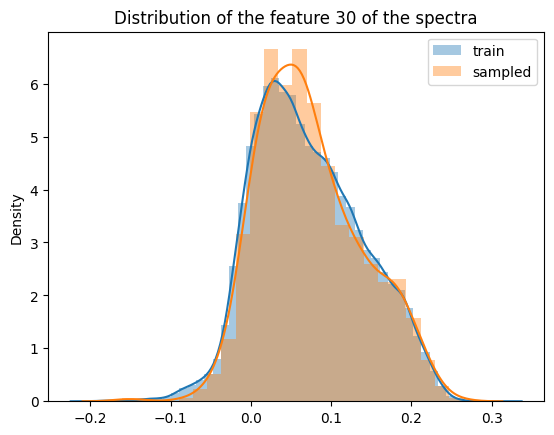

In [69]:
#plot the distribution with seaborne
import seaborn as sns

index = 30
sns.distplot(X_train_freq[:, index, 0], label="train")
sns.distplot(X_sampled_freq[:, index, 0], label="sampled")
plt.title(f"Distribution of the feature {index} of the spectra")
plt.legend()

In [11]:
variances = np.var(X_train_freq[:, :, 0], axis = 0)
#Sort the variances
top5 = np.argsort(variances)[-5:]
print(top5)
print(variances[top5])

[ 2 95  1 94  0]
[0.11476944 0.17960861 0.19625303 0.45865643 2.0841074 ]


In [18]:
#Extract the indices of time series with the highest mean
top5 = np.argsort(mean_train)[-5:]
for index in top5:
    plt.figure(figsize=(10, 5))
    plt.plot(X_train_time[index, :])
    plt.title(f"Train Time series n°{index}, in the top 5 of the highest mean")
    plt.show()

NameError: name 'mean_train' is not defined

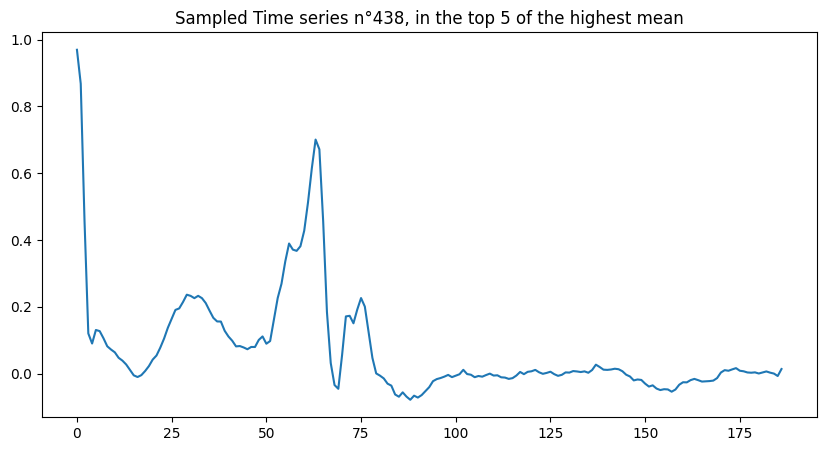

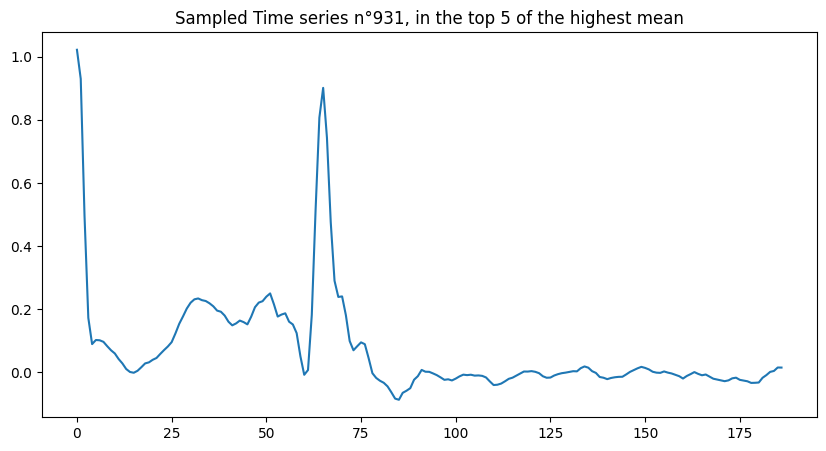

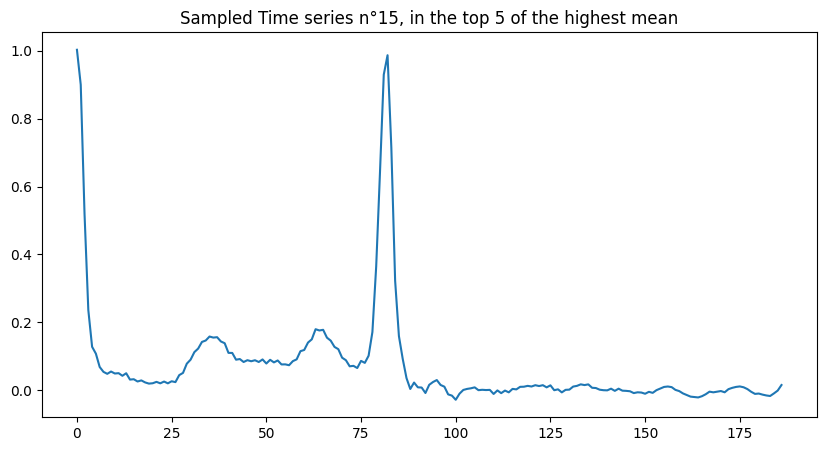

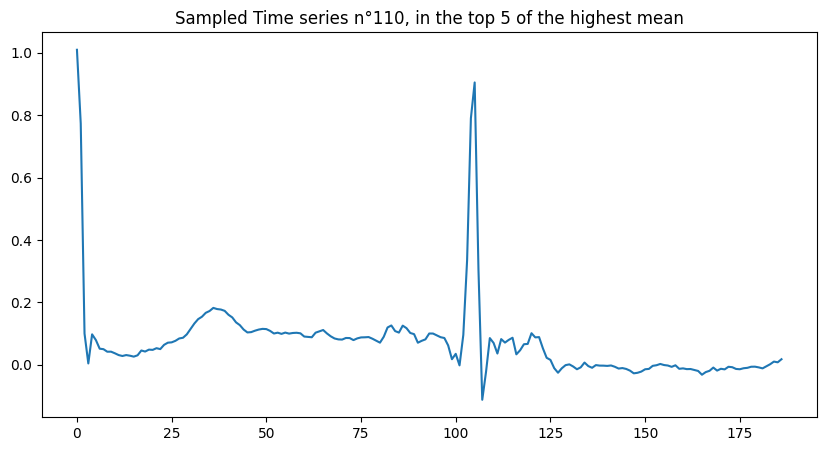

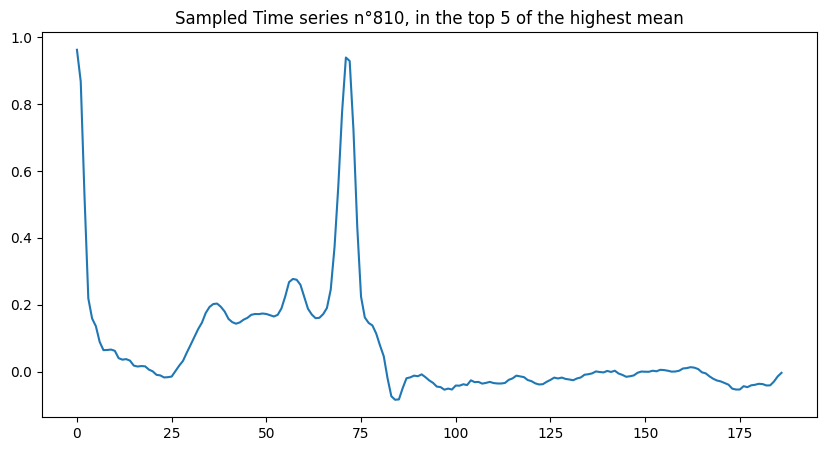

In [93]:
#Extract the indices of time series with the highest mean
top5 = np.argsort(mean_sampled)[-5:]
for index in top5:
    plt.figure(figsize=(10, 5))
    plt.plot(X_train_sampled[index, :])
    plt.title(f"Sampled Time series n°{index}, in the top 5 of the highest mean")
    plt.show()

In [1]:
import torch

In [2]:
a = torch.randn(2, 3, 1)

b = torch.tensor([[1], [2], [3]])
print(a)
print(a*b)

tensor([[[ 0.3943],
         [-0.2843],
         [ 0.1959]],

        [[ 0.6632],
         [ 0.3921],
         [-1.5054]]])
tensor([[[ 0.3943],
         [-0.5687],
         [ 0.5876]],

        [[ 0.6632],
         [ 0.7842],
         [-4.5163]]])


In [22]:
a = torch.rand(size = (10, 5, 3))
mean = a.mean(dim = 0) 
std = a.std(dim = 0)

a_standardized = (a - mean) / std

#compute the variance
dd = a_standardized.var(dim = 0)
print(var)

tensor([[ 1.1921e-08,  2.9802e-08,  1.7881e-08],
        [-1.7881e-08,  3.5763e-08, -2.9802e-08],
        [ 0.0000e+00,  5.9605e-09,  2.9802e-08],
        [-8.3447e-08, -5.9605e-09, -3.5763e-08],
        [-5.9605e-09, -1.7881e-08, -1.1921e-08]])


In [61]:
from fdiff.dataloaders.datamodules import ECGDatamodule

datamodule = ECGDatamodule(standardize=True, fourier_transform=False)

datamodule.prepare_data()
datamodule.setup("fit")

In [62]:
trainloader = datamodule.train_dataloader()

In [63]:
dataset = trainloader.dataset

In [64]:
sample = dataset[50]["X"]

In [65]:
#compute the norm of the sample
norm = torch.norm(sample)

In [66]:
norm

tensor(12.1362)

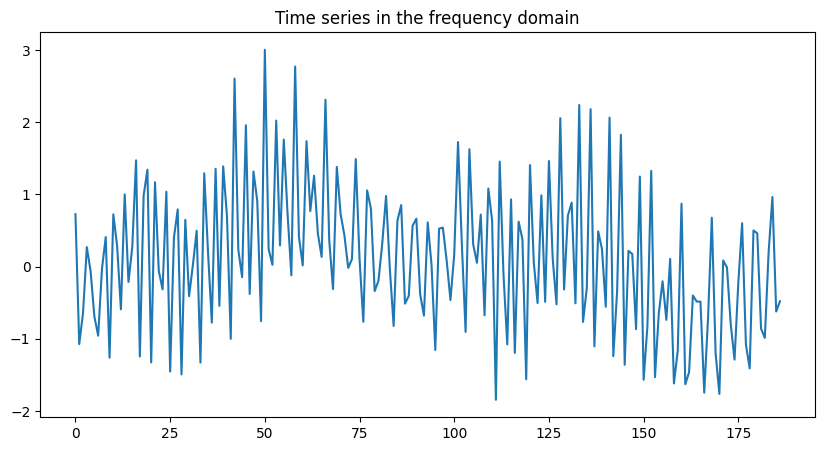

In [86]:
from fdiff.dataloaders.datamodules import ECGDatamodule
fourier_transform = True
standardize = True
datamodule = ECGDatamodule(standardize=standardize, fourier_transform=fourier_transform)

datamodule.prepare_data()
datamodule.setup("fit")
trainloader = datamodule.train_dataloader()
dataset = trainloader.dataset
sample = dataset[10]["X"].detach().cpu().numpy()
#plot the time series
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(sample)
if fourier_transform:
    plt.title("Time series in the frequency domain")
else:
    plt.title("Time series")
plt.show()



In [77]:
torch.min(dataset.X, dim = 0)


torch.return_types.min(
values=tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
   

In [84]:
X_sampled_freq = dft(X_train_sampled).detach().cpu().numpy()

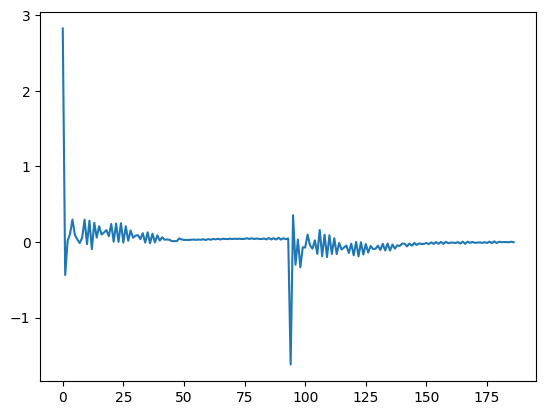

In [85]:
plt.plot(X_sampled_freq[0])
plt.show()

In [88]:
#Generate a random time series

f = 2
phi = 1.75
t = torch.linspace(0, 1000, 1000)
ts = torch.sin(f*t+phi)

In [90]:
freq_representation= dft(ts.unsqueeze(0).unsqueeze(2)).detach().cpu().numpy()   

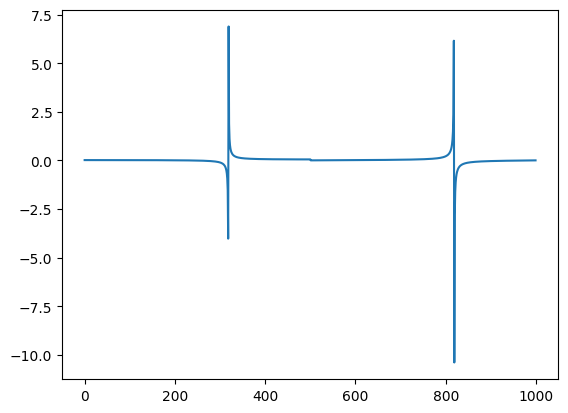

In [91]:
plt.plot(freq_representation[0])


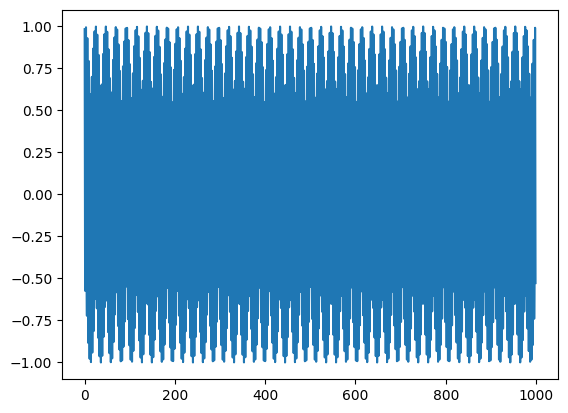

In [92]:
plt.plot(ts.detach().cpu().numpy())

In [1]:
import torch

In [13]:
a = torch.eye(2)
a[0]*=2
a_reshapes = a.view(1,2,2)

print(a_reshapes.shape)
b = torch.randn(size = (3, 2,3))
print(b)

torch.Size([1, 2, 2])
tensor([[[ 0.8624, -0.2127, -1.8866],
         [-2.1147,  0.8421,  1.1372]],

        [[ 1.2391, -0.9685,  1.2943],
         [ 0.8128,  0.3679, -0.0923]],

        [[ 1.3376,  0.9920, -0.7995],
         [-0.3983,  1.1216, -0.3412]]])


In [14]:
torch.matmul(a_reshapes, b) 

tensor([[[ 1.7249, -0.4255, -3.7732],
         [-2.1147,  0.8421,  1.1372]],

        [[ 2.4783, -1.9370,  2.5885],
         [ 0.8128,  0.3679, -0.0923]],

        [[ 2.6753,  1.9840, -1.5989],
         [-0.3983,  1.1216, -0.3412]]])

torch.Size([10, 20, 3])


In [8]:
import torch

batch_size = 5
max_len = 3
n_channels = 2

beta1 = 3
beta0 = 1

G = torch.ones((max_len))
G[0] *= 2

t = torch.rand(size = (batch_size,))
x = torch.rand(size = (batch_size, max_len, n_channels))

log_mean_coeff = (
            -0.25 * t**2 * (beta1 - beta0) - 0.5 * t * beta0
        )

mean = (
    torch.exp(log_mean_coeff[(...,) + (None,) * len(x.shape[1:])]) * x
)  # mean: (batch_size, max_len, n_channels)

std = (
    torch.sqrt((1.0 - torch.exp(2.0 * log_mean_coeff.view(-1, 1)))) * G
)# std: (batch_size, max_len)

print( torch.exp(log_mean_coeff[(...,) + (None,) * len(x.shape[1:])]).shape)
print(torch.sqrt((1.0 - torch.exp(2.0 * log_mean_coeff.view(-1, 1)))).shape)

assert mean.shape == x.shape
assert std.shape == (batch_size, max_len)

torch.Size([5, 1, 1])
torch.Size([5, 1])


In [10]:
G_matrix = torch.diag(G)

scaling_matrix = G_matrix.view(
            -1, G_matrix.shape[0], G_matrix.shape[1]
        )

# Return G@z where z \sim N(0,I)
noise =  torch.matmul(scaling_matrix, torch.randn(*x.shape))
assert noise.shape == x.shape

In [13]:
from tqdm import tqdm 
eps = 1e-5
num_diffusion_steps = 1000
timesteps =  torch.linspace(
            1.0, eps, num_diffusion_steps)
for t in tqdm(timesteps,
                    desc="Diffusion",
                    unit="step",
                    leave=False,
                    colour="green",
                ):
    print(t)

                                                                 86step/s]

tensor(1.)
tensor(0.9990)
tensor(0.9980)
tensor(0.9970)
tensor(0.9960)
tensor(0.9950)
tensor(0.9940)
tensor(0.9930)
tensor(0.9920)
tensor(0.9910)
tensor(0.9900)
tensor(0.9890)
tensor(0.9880)
tensor(0.9870)
tensor(0.9860)
tensor(0.9850)
tensor(0.9840)
tensor(0.9830)
tensor(0.9820)
tensor(0.9810)
tensor(0.9800)
tensor(0.9790)
tensor(0.9780)
tensor(0.9770)
tensor(0.9760)
tensor(0.9750)
tensor(0.9740)
tensor(0.9730)
tensor(0.9720)
tensor(0.9710)
tensor(0.9700)
tensor(0.9690)
tensor(0.9680)
tensor(0.9670)
tensor(0.9660)
tensor(0.9650)
tensor(0.9640)
tensor(0.9630)
tensor(0.9620)
tensor(0.9610)
tensor(0.9600)
tensor(0.9590)
tensor(0.9580)
tensor(0.9570)
tensor(0.9560)
tensor(0.9550)
tensor(0.9540)
tensor(0.9530)
tensor(0.9520)
tensor(0.9510)
tensor(0.9500)
tensor(0.9489)
tensor(0.9479)
tensor(0.9469)
tensor(0.9459)
tensor(0.9449)
tensor(0.9439)
tensor(0.9429)
tensor(0.9419)
tensor(0.9409)
tensor(0.9399)
tensor(0.9389)
tensor(0.9379)
tensor(0.9369)
tensor(0.9359)
tensor(0.9349)
tensor(0.9339)

In [1]:
from fdiff.schedulers.vpsde_scheduler import VPScheduler

scheduler = VPScheduler( beta_min = 0.1,
        beta_max = 20,
        max_len = 5,
        noise_scaling = True ,
        eps = 1e-5,
        device = "cuda",)

In [2]:
import torch
noise1 = scheduler.prior_sampling((10, 5, 2))
noise2 = torch.randn((10, 5, 2), device = "cuda")
timesteps = torch.rand(size = (10,), device = "cuda")
scheduler.add_noise(noise2, noise1, timesteps=timesteps)

tensor([[[ 8.9751e-01, -5.2757e-02],
         [ 1.8110e+00,  1.7822e-01],
         [ 2.2110e-02, -5.5224e-01],
         [-1.4410e+00,  2.6017e-01],
         [-1.5037e+00, -1.0876e-01]],

        [[-3.7387e-01, -7.6056e-03],
         [ 4.4367e-01,  6.3526e-01],
         [-1.7733e-02,  2.9670e-01],
         [ 9.3770e-03,  3.5369e-01],
         [-2.5185e-01,  6.4250e-04]],

        [[ 3.5550e-01,  2.9286e-01],
         [ 1.5228e-01,  6.4280e-01],
         [-5.6537e-01, -5.8901e-01],
         [-2.2873e-01,  3.7565e-01],
         [ 3.5861e-01,  2.6909e-01]],

        [[ 5.2360e-02,  1.0532e-01],
         [ 3.1142e-01, -2.8250e-01],
         [-5.7605e-01, -3.9414e-01],
         [ 9.2067e-01,  2.5993e-01],
         [-3.0417e-01, -3.6104e-01]],

        [[ 6.1682e-01, -1.2400e+00],
         [ 8.3097e-01, -1.1754e+00],
         [ 5.4811e-01, -3.4133e-01],
         [ 5.0452e-01,  1.1378e+00],
         [-4.7155e-01, -8.9397e-01]],

        [[ 6.7212e-01,  2.4842e-01],
         [ 1.4584e-01, -1.14

In [3]:
scheduler.set_timesteps(10)
scheduler.timesteps

scheduler.step(noise2, torch.tensor(0.5, device = "cuda"), noise1)

tensor([[[-7.1654e-01,  3.7200e-01],
         [-3.7769e-01, -8.3433e-01],
         [-7.4661e-02, -1.2607e-01],
         [-9.7766e-02, -8.6151e-02],
         [-5.2673e-01,  2.6780e-01]],

        [[-1.2350e-01, -5.6319e-02],
         [-8.9823e-02,  1.3350e-01],
         [ 4.0184e-01,  8.1164e-01],
         [-2.7858e-01,  4.6235e-01],
         [-7.4631e-01,  7.9853e-02]],

        [[-6.2408e-01, -7.3760e-01],
         [ 2.7578e-01, -2.4078e-02],
         [-1.9375e-01,  6.4668e-02],
         [-2.1731e-01,  3.4354e-01],
         [ 1.0589e-01,  1.9165e-01]],

        [[-7.4874e-02,  6.1847e-01],
         [-3.4656e-01, -6.7281e-01],
         [-1.5027e-01,  2.1538e-02],
         [ 5.0691e-01,  8.6261e-02],
         [ 5.2802e-01,  5.1003e-01]],

        [[ 3.2402e-02,  4.0191e-01],
         [ 1.0217e-01, -3.9644e-02],
         [ 1.6025e-01, -1.0025e-01],
         [ 9.3499e-02,  4.3848e-01],
         [ 5.1427e-01,  2.1053e-02]],

        [[-2.8333e-01,  1.2383e+00],
         [ 1.0092e-01, -1.10

In [1]:
import torch

tensor([[ -0.0000,  -0.2683,  -0.5365,  -0.8048,  -1.0730,  -1.3413,  -1.6096,
          -1.8778,  -2.1461,  -2.4143,  -2.6826,  -2.9508,  -3.2191,  -3.4874,
          -3.7556,  -4.0239,  -4.2921,  -4.5604,  -4.8287,  -5.0969],
        [ -0.0000,  -1.5406,  -3.0811,  -4.6217,  -6.1623,  -7.7029,  -9.2434,
         -10.7840, -12.3246, -13.8652, -15.4057, -16.9463, -18.4869, -20.0275,
         -21.5680, -23.1086, -24.6492, -26.1898, -27.7303, -29.2709]])
tensor([[-0.2683],
        [-1.5406]])
tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19])


In [8]:
G = 2*torch.eye(2)

In [9]:
G = G.view(-1, G.shape[0], G.shape[1])

In [11]:
z = torch.randn(size = (3, 2, 3))

print(z)
print(torch.matmul(G, z))

tensor([[[ 0.5100, -0.9208, -0.2456],
         [-2.1091,  0.4659,  0.0751]],

        [[ 0.4304, -1.0167,  0.2399],
         [ 1.0023, -1.4584, -0.1509]],

        [[-0.0620, -0.9610, -0.5226],
         [-0.3786, -0.5856, -1.3900]]])
tensor([[[ 1.0200, -1.8415, -0.4913],
         [-4.2183,  0.9318,  0.1503]],

        [[ 0.8608, -2.0335,  0.4797],
         [ 2.0046, -2.9169, -0.3017]],

        [[-0.1239, -1.9220, -1.0451],
         [-0.7571, -1.1713, -2.7800]]])


In [15]:
a = torch.ones((3,))
a[-1]*=2
x = torch.randn((3, 2, 3))
print(x)
print(a[(...,) + (None,) * len(x.shape[1:])] * x)

tensor([[[-0.2404,  0.2899, -0.5313],
         [-0.7661, -0.7980, -0.6415]],

        [[-0.4241, -0.8935,  0.8587],
         [-1.1382,  0.6030,  0.3213]],

        [[-0.4480, -0.0449,  0.8720],
         [-0.4897, -0.5635, -2.1836]]])
tensor([[[-0.2404,  0.2899, -0.5313],
         [-0.7661, -0.7980, -0.6415]],

        [[-0.4241, -0.8935,  0.8587],
         [-1.1382,  0.6030,  0.3213]],

        [[-0.8960, -0.0898,  1.7439],
         [-0.9793, -1.1270, -4.3671]]])


In [20]:
G = torch.rand(size = (3,))
print( a.view(-1,1)*G)
print(a)
print(G)

tensor([[0.0347, 0.2942, 0.9112],
        [0.0347, 0.2942, 0.9112],
        [0.0694, 0.5885, 1.8224]])
tensor([1., 1., 2.])
tensor([0.0347, 0.2942, 0.9112])


(2000, 100)


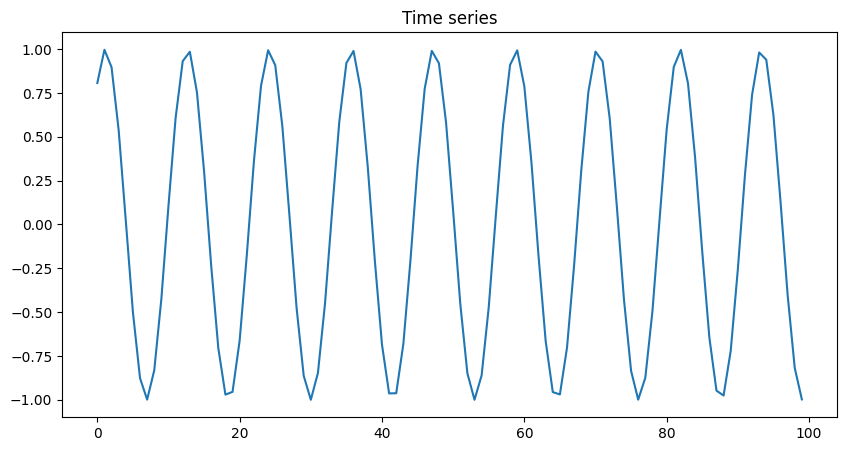

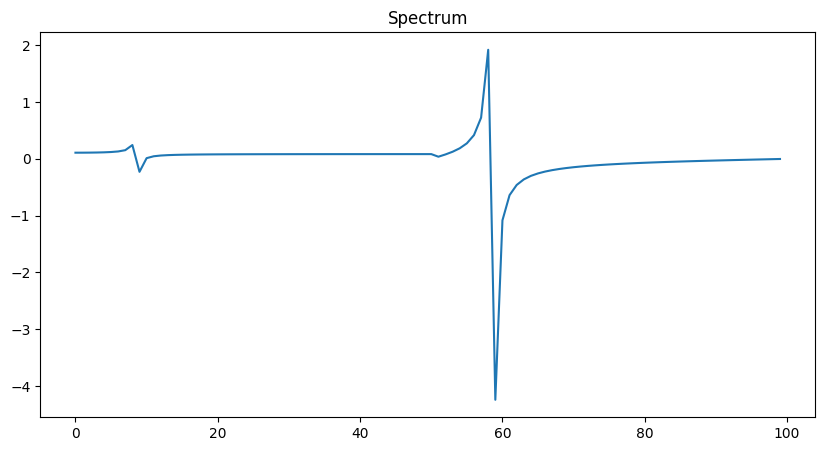

In [22]:
import numpy as np 
num_samples = 1000
max_len = 100
n_generated = 2 * num_samples  # For train + test
phase = np.random.normal(size=(n_generated)).reshape(-1,1)
frequency = np.random.beta(a=2, b=2, size=(n_generated)).reshape(-1, 1)
timesteps = np.arange(max_len)
X = np.sin(frequency*timesteps  + phase)
print(X.shape)
X_train = X[: num_samples]
X_test = X[num_samples :]

#plot a time series
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(X_train[0])
plt.title("Time series")
plt.show()
#import dtf
from fdiff.utils.fourier import dft, idft
X_train_freq = dft(torch.tensor(X_train).unsqueeze(2))

#plot
plt.figure(figsize=(10, 5))
plt.plot(X_train_freq[0])
plt.title("Spectrum")
plt.show()



In [1]:
# Create a datamodule for ECG
from fdiff.dataloaders.datamodules import SyntheticDatamodule

datamodule = SyntheticDatamodule()

datamodule.prepare_data()
datamodule.setup("fit")

/home/nvth2/miniconda/envs/fourier/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


torch.Size([1000, 100, 1])